## Observations and Insights 

## Insights 
Very interesting facts could be gathered from all the analysis performed on the data from the laboratory, here are the most important ones:

    1. The sex distribution for mice is almost 50%-50%. This gives the idea that the treatments are not biased by sex and it works the same for both male and female. And when moved from testing environment to Actual Humans, we have less risk of sex biasing.
    
    2. Based on our outliers analysis, we can consider all our final tumour data as normal distributed data, and when performing more analysis on this data, our results will not be distorted.
    
    3. As you can see in Linear and Scatter Plots section, Capomulin seems to reduce the tumor volume, which is a great sign of cancer reduction. This treament shows enormous positive results and will definitely pass needed for the next steps.
    
    4. Finally, in the last section, we can see a clear lineal relationship between Average Tumor Volume and Weight, concluding that fatter Mice are more prone to develop bigger tumors.

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merged_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
mouse_merged_df.head(10000)

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [98]:
# Checking the number of mice.
unique_mouseid = mouse_merged_df["Mouse ID"].unique()
number_mice = len(unique_mouseid)
print("There are: "+str(number_mice)+" mice")

There are: 249 mice


In [99]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
id_timepoint_df = mouse_merged_df[["Mouse ID","Timepoint"]]
repeated_df = id_timepoint_df.loc[id_timepoint_df[["Mouse ID","Timepoint"]].duplicated()==True,:]
print("The duplicate values are: ")
unique_repeated = repeated_df["Mouse ID"].unique()[0]
repeated_df.head()

The duplicate values are: 


Mouse ID  Timepoint
909     g989          0
911     g989          5
913     g989         10
915     g989         15
917     g989         20

In [100]:
# Optional: Get all the data for the duplicate mouse ID. 
data_optional_df = mouse_merged_df.loc[mouse_merged_df["Mouse ID"]=="g989",:]

data_optional_df.head(20)

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [101]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_repeated_df = mouse_merged_df.loc[mouse_merged_df["Mouse ID"] != unique_repeated,:]
no_repeated_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [102]:
# Checking the number of mice in the clean DataFrame.
unique_mouseid_norep = no_repeated_df["Mouse ID"].unique()
number_mice_norep = len(unique_mouseid_norep)
print("There are: "+str(number_mice_norep)+" mice")


There are: 248 mice


## Summary Statistics

In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_groupby = no_repeated_df.groupby(by=["Drug Regimen"])
mean_tumor = regimen_groupby["Tumor Volume (mm3)"].mean()
median_tumor = regimen_groupby["Tumor Volume (mm3)"].median()
variance_tumor = regimen_groupby["Tumor Volume (mm3)"].var(ddof=0)
standard_tumor = regimen_groupby["Tumor Volume (mm3)"].std(ddof=0)
sem_tumor = regimen_groupby["Tumor Volume (mm3)"].sem(ddof=0)
summary_columns = {"Mean":mean_tumor,"Median":median_tumor,"Variance":variance_tumor,
                 "Std. Dev":standard_tumor,"SEM":sem_tumor}
summary_df = pd.DataFrame(summary_columns)
print("Summary Statistics of Tumor Volume for each regimen")
summary_df.head(10)


Summary Statistics of Tumor Volume for each regimen


Mean     Median   Variance  Std. Dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.839296  4.983904  0.328629
Ceftamin      52.591172  51.776157  39.069446  6.250556  0.468499
Infubinol     52.884795  51.820584  42.886388  6.548770  0.490851
Ketapril      55.235638  53.698743  68.188930  8.257659  0.602252
Naftisol      54.331565  52.509285  65.817708  8.112811  0.594860
Placebo       54.033581  52.288934  60.830138  7.799368  0.579722
Propriva      52.320930  50.446266  43.555716  6.599675  0.542490
Ramicane      40.216745  40.673236  23.383692  4.835669  0.320250
Stelasyn      54.233149  52.431737  59.122106  7.689090  0.571526
Zoniferol     53.236507  51.818479  48.266689  6.947423  0.514977

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = regimen_groupby.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
agg_df.head(10)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Measurements taken on each Drug Regimen')

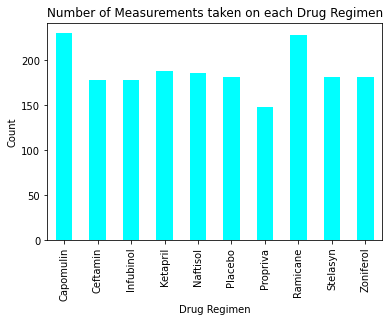

In [105]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_regimen = regimen_groupby["Drug Regimen"].count()
count_regimen.plot(kind="bar",colormap="cool",ylabel="Count")
plt.title("Number of Measurements taken on each Drug Regimen")

(-0.5, 9.5)

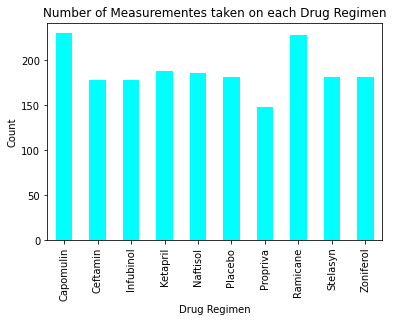

In [106]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(regimen_groupby["Drug Regimen"].count()))
tick_locations = [value for value in x_axis]
width = [0.5 for value in x_axis]
new_x_axis = regimen_groupby["Drug Regimen"].count().index
plt.bar(x_axis,regimen_groupby["Drug Regimen"].count(),color="aqua",align="center",width=width)
plt.xticks(tick_locations,new_x_axis,rotation="vertical")
plt.ylabel("Count")
plt.xlabel("Drug Regimen")
plt.title("Number of Measurementes taken on each Drug Regimen")
plt.xlim(-.5,len(width)-0.5)


(-1.1079114197007642,
 1.1041200173094385,
 -1.1065502689644005,
 1.1003119175697333)

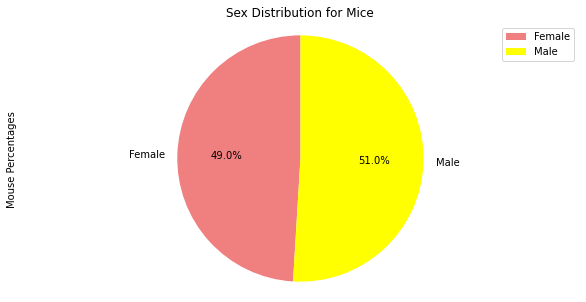

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_groupby = no_repeated_df.groupby(by=["Sex"])
gender_count = gender_groupby.count()
gender_sex = gender_count.plot(kind="pie",y="Mouse ID",title=("Sex Distribution for Mice"),startangle=90,
figsize=(10,5), autopct='%1.1f%%',colors=["lightcoral","yellow"])
plt.ylabel("Mouse Percentages")
plt.axis("Equal")

Text(0, 0.5, 'Mouse Percentages')

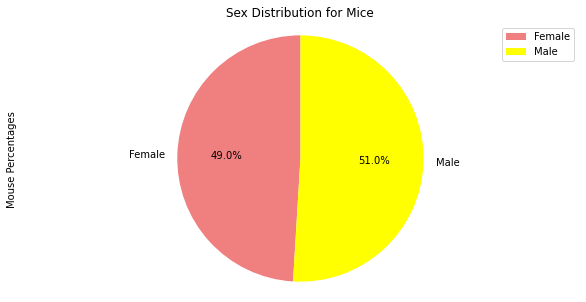

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(10,5))
plt.pie(gender_count["Mouse ID"],labels=gender_count["Mouse ID"].index,startangle=90,colors=["lightcoral","yellow"], autopct='%1.1f%%')
plt.axis("Equal")
plt.legend()
plt.title("Sex Distribution for Mice")
plt.ylabel("Mouse Percentages")




## Quartiles, Outliers and Boxplots

In [109]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimen = no_repeated_df["Drug Regimen"]
four_regimen_df = no_repeated_df.loc[((drug_regimen == "Capomulin") | (drug_regimen == "Ramicane") | (drug_regimen == "Infubinol")
                                      | (drug_regimen == "Ceftamin")),:]
four_regimen_groupby = four_regimen_df.groupby(by=["Mouse ID"])

# Start by getting the last (greatest) timepoint for each mouse
max_values_mouse = four_regimen_groupby["Timepoint"].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_max_original_df = pd.merge(max_values_mouse,four_regimen_df, on = ["Mouse ID","Timepoint"])



In [110]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
empty_tumor = []
for treatment in treatment_list:
    entry_tumor = merged_max_original_df.loc[merged_max_original_df["Drug Regimen"] == str(treatment), :] 
    empty_tumor.append(entry_tumor["Tumor Volume (mm3)"])

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
count = 0
outliers_range_list = []
for information in empty_tumor:
    quartiles = information.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq-1.5*iqr
    upper_bound = upperq+1.5*iqr
    print("Values for "+ str(treatment_list[count])+ " below "+str(lower_bound)+" might be outlier")
    print("Values for "+ str(treatment_list[count])+ " above "+str(upper_bound)+" might be outlier")
    outliers_list = [out_of  for out_of in information if out_of <= lower_bound or out_of >= upper_bound]
    if len(outliers_list) == 0:
        print("No outliers for "+ str(treatment_list[count]))
    else:
        print("The outliers for "+ str(treatment_list[count])+" are: "+str(outliers_list))
    print("---------------------------------------------------------------------------------------")
    count+=1
    

Values for Capomulin below 20.70456164999999 might be outlier
Values for Capomulin above 51.83201549 might be outlier
No outliers for Capomulin
---------------------------------------------------------------------------------------
Values for Ramicane below 17.912664470000003 might be outlier
Values for Ramicane above 54.30681135 might be outlier
No outliers for Ramicane
---------------------------------------------------------------------------------------
Values for Infubinol below 36.83290494999999 might be outlier
Values for Infubinol above 82.74144559000001 might be outlier
The outliers for Infubinol are: [36.321345799999996]
---------------------------------------------------------------------------------------
Values for Ceftamin below 25.355449580000002 might be outlier
Values for Ceftamin above 87.66645829999999 might be outlier
No outliers for Ceftamin
---------------------------------------------------------------------------------------


Text(0, 0.5, 'Tumour Volume')

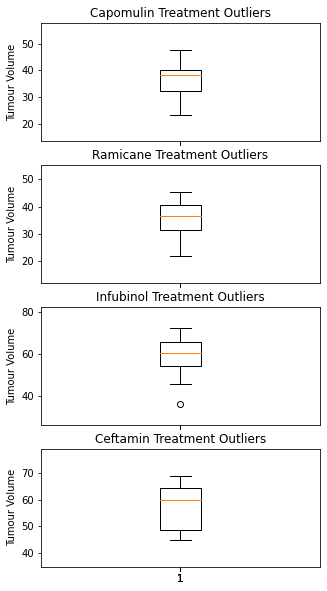

In [111]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,sharex=True,figsize=(5,10))
ax1.boxplot(empty_tumor[0])
ax1.set_ylim(empty_tumor[0].min()-10,empty_tumor[0].max()+10)
ax1.set_title("Capomulin Treatment Outliers")
ax1.set_ylabel("Tumour Volume")
ax2.boxplot(empty_tumor[1])
ax2.set_ylim(empty_tumor[1].min()-10,empty_tumor[1].max()+10)
ax2.set_title("Ramicane Treatment Outliers")
ax2.set_ylabel("Tumour Volume")
ax3.boxplot(empty_tumor[2])
ax3.set_ylim(empty_tumor[2].min()-10,empty_tumor[2].max()+10)
ax3.set_title("Infubinol Treatment Outliers")
ax3.set_ylabel("Tumour Volume")
ax4.boxplot(empty_tumor[3])
ax4.set_ylim(empty_tumor[3].min()-10,empty_tumor[3].max()+10)
ax4.set_title("Ceftamin Treatment Outliers")
ax4.set_ylabel("Tumour Volume")





## Line and Scatter Plots

Text(0.5, 1.0, 'Improvements in Tumor Volume with Capomulin')

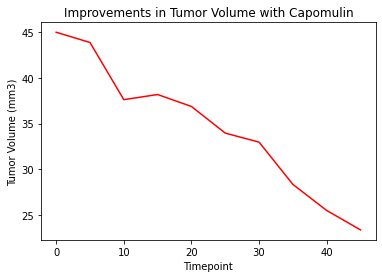

In [112]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin_df = no_repeated_df.loc[no_repeated_df["Drug Regimen"]=="Capomulin",:]
select_mouse_df = mouse_capomulin_df.loc[mouse_capomulin_df["Mouse ID"]=="s185"]
x_axis = select_mouse_df["Timepoint"]
y_axis = select_mouse_df["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis,color="red")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Improvements in Tumor Volume with Capomulin")

Text(0.5, 1.0, 'A comparison of Tumor Volume vs Weight for Capomulin treatment')

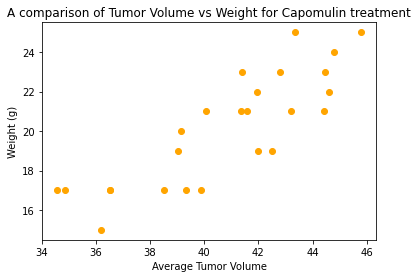

In [113]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_grpby = mouse_capomulin_df.groupby(by="Mouse ID")
average_tumor_vol = capomulin_grpby["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_grpby["Weight (g)"].mean()
plt.scatter(average_tumor_vol,mouse_weight,facecolors="orange")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Weight (g)")
plt.title("A comparison of Tumor Volume vs Weight for Capomulin treatment")

## Correlation and Regression

The correlation for Average Tumor Volume and Weight is: 0.8419363424694717
The r squared is: 0.7088568047708717


Text(36, 24, 'y = 0.74x + -10.15')

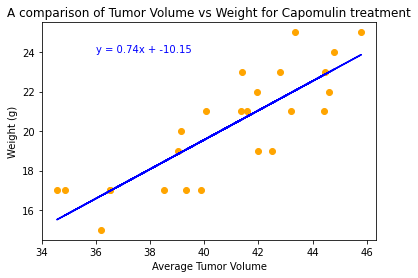

In [114]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlations = st.pearsonr(average_tumor_vol,mouse_weight)
print("The correlation for Average Tumor Volume and Weight is: "+str(correlations[0]))
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(average_tumor_vol,mouse_weight)
print("The r squared is: "+str(rvalue**2))
regress_values = average_tumor_vol * slope + intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
plt.scatter(average_tumor_vol,mouse_weight,facecolors="orange")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Weight (g)")
plt.title("A comparison of Tumor Volume vs Weight for Capomulin treatment")
plt.plot(average_tumor_vol,regress_values,"b-")
plt.annotate(line_eq,(36,24),fontsize=10,color="blue")
